In [1]:
# import packages
import pandas as pd                       # data frame handling
import statsmodels.formula.api as sm      # stats module
import matplotlib.pyplot as plt           # matlab-like plotting
import numpy as np                        # big, fast arrays for maths
import scipy.stats as ss
import seaborn as sns

In [3]:
# get csv file 
datafile = 'C:/Users/adeni/OneDrive/Desktop/UALR/2nd_Semester_Spring/Business_App_BINS7304/Python/CarsCountrySP2023.csv'
carsDF = pd.read_csv(datafile)
carsDF.head(10)

,country,model,cyl,drive,fuel,vehClass,mpg
0,Japan,ACURA ILX,4.0,2WD,Gasoline,small car,28
1,Japan,ACURA MDX,6.0,4WD,Gasoline,small SUV,27
2,Japan,ACURA MDX,6.0,2WD,Gasoline,small SUV,23
3,Japan,ACURA MDX,6.0,4WD,Gasoline,small SUV,22
4,Japan,ACURA MDX A-spec,6.0,4WD,Gasoline,small SUV,21
5,Japan,ACURA NSX,6.0,4WD,Gasoline,small car,21
6,Japan,ACURA RDX,4.0,2WD,Gasoline,small SUV,24
7,Japan,ACURA RDX,4.0,4WD,Gasoline,small SUV,23
8,Japan,ACURA RDX A-SPEC,4.0,2WD,Gasoline,small SUV,24
9,Japan,ACURA RDX A-SPEC,4.0,4WD,Gasoline,small SUV,23


In [7]:
carsDF.describe()

,cyl,mpg
count,1100.000000,1112.000000
mean,5.452727,24.365108
std,1.759038,10.206939
min,3.000000,11.000000
25%,4.000000,20.000000
50%,6.000000,23.000000
75%,6.000000,27.000000
max,16.000000,136.000000


In [8]:
carsDF.describe(include=np.object)

C:\Users\adeni\AppData\Local\Temp\ipykernel_23588\3311850515.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  carsDF.describe(include=np.object)


,country,model,drive,fuel,vehClass
count,1112,1112,1112,1112,1112
unique,7,523,2,4,10
top,US,CHEVROLET Silverado 10,2WD,Gasoline,small car
freq,350,16,630,1076,338


In [9]:
carsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112 entries, 0 to 1111
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   1112 non-null   object 
 1   model     1112 non-null   object 
 2   cyl       1100 non-null   float64
 3   drive     1112 non-null   object 
 4   fuel      1112 non-null   object 
 5   vehClass  1112 non-null   object 
 6   mpg       1112 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 60.9+ KB


In [10]:
#separate MPG by country
carsGER = carsDF[carsDF['country']=='Germany']
carsGER[:5]

,country,model,cyl,drive,fuel,vehClass,mpg
28,Germany,AUDI A4,4.0,4WD,Gasoline,small car,27
29,Germany,AUDI A5,4.0,4WD,Gasoline,small car,27
30,Germany,AUDI A5 Cabriolet,4.0,4WD,Gasoline,small car,27
31,Germany,AUDI A5 Sportback quattro,4.0,4WD,Gasoline,midsize car,27
32,Germany,AUDI A6,6.0,4WD,Gasoline,midsize car,25


In [11]:
carsGER.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257 entries, 28 to 1086
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   257 non-null    object 
 1   model     257 non-null    object 
 2   cyl       255 non-null    float64
 3   drive     257 non-null    object 
 4   fuel      257 non-null    object 
 5   vehClass  257 non-null    object 
 6   mpg       257 non-null    int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 16.1+ KB


In [13]:
carsITA = carsDF[carsDF['country']=='Italy']
carsITA[:5]

,country,model,cyl,drive,fuel,vehClass,mpg
18,Italy,ALFA ROMEO 4C,4.0,2WD,Gasoline,small car,28
19,Italy,ALFA ROMEO Giulia,4.0,2WD,Gasoline,midsize car,27
20,Italy,ALFA ROMEO Giulia,6.0,2WD,Gasoline,midsize car,20
21,Italy,ALFA ROMEO Giulia AWD,4.0,4WD,Gasoline,midsize car,26
22,Italy,ALFA ROMEO Stelvio,4.0,2WD,Gasoline,small SUV,25


In [14]:
carsITA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 18 to 753
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   25 non-null     object 
 1   model     25 non-null     object 
 2   cyl       25 non-null     float64
 3   drive     25 non-null     object 
 4   fuel      25 non-null     object 
 5   vehClass  25 non-null     object 
 6   mpg       25 non-null     int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 1.6+ KB


In [15]:
carsJAP = carsDF[carsDF['country']=='Japan']
carsJAP[:5]

,country,model,cyl,drive,fuel,vehClass,mpg
0,Japan,ACURA ILX,4.0,2WD,Gasoline,small car,28
1,Japan,ACURA MDX,6.0,4WD,Gasoline,small SUV,27
2,Japan,ACURA MDX,6.0,2WD,Gasoline,small SUV,23
3,Japan,ACURA MDX,6.0,4WD,Gasoline,small SUV,22
4,Japan,ACURA MDX A-spec,6.0,4WD,Gasoline,small SUV,21


In [16]:
carsJAP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 1073
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   274 non-null    object 
 1   model     274 non-null    object 
 2   cyl       272 non-null    float64
 3   drive     274 non-null    object 
 4   fuel      274 non-null    object 
 5   vehClass  274 non-null    object 
 6   mpg       274 non-null    int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 17.1+ KB


In [17]:
carsKOR = carsDF[carsDF['country']=='Korea']
carsKOR[:5]

,country,model,cyl,drive,fuel,vehClass,mpg
362,Korea,GENESIS G70,4.0,2WD,Gasoline,small car,22
363,Korea,GENESIS G70,4.0,2WD,Gasoline,small car,25
364,Korea,GENESIS G70,4.0,4WD,Gasoline,small car,23
365,Korea,GENESIS G70,6.0,2WD,Gasoline,small car,21
366,Korea,GENESIS G70,6.0,4WD,Gasoline,small car,20


In [18]:
carsKOR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 362 to 656
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   106 non-null    object 
 1   model     106 non-null    object 
 2   cyl       101 non-null    float64
 3   drive     106 non-null    object 
 4   fuel      106 non-null    object 
 5   vehClass  106 non-null    object 
 6   mpg       106 non-null    int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 6.6+ KB


In [19]:
carsSWE = carsDF[carsDF['country']=='Sweden']
carsSWE[:5]

,country,model,cyl,drive,fuel,vehClass,mpg
1087,Sweden,VOLKSWAGEN Tiguan 4Motion,4.0,4WD,Gasoline,small SUV,24
1088,Sweden,VOLKSWAGEN e-Golf,NaN,2WD,Electricity,small car,119
1089,Sweden,VOLVO Atlas,4.0,2WD,Gasoline,small SUV,24
1090,Sweden,VOLVO Atlas,6.0,2WD,Gasoline,small SUV,19
1091,Sweden,VOLVO Atlas 4Motion,6.0,4WD,Gasoline,standard SUV,19


In [20]:
carsSWE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1087 to 1111
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   25 non-null     object 
 1   model     25 non-null     object 
 2   cyl       24 non-null     float64
 3   drive     25 non-null     object 
 4   fuel      25 non-null     object 
 5   vehClass  25 non-null     object 
 6   mpg       25 non-null     int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 1.6+ KB


In [21]:
carsUK = carsDF[carsDF['country']=='UK']
carsUK[:5]

,country,model,cyl,drive,fuel,vehClass,mpg
25,UK,ASTON MARTIN DB11,8.0,2WD,Gasoline,small car,20
26,UK,ASTON MARTIN DB11,12.0,2WD,Gasoline,small car,18
27,UK,ASTON MARTIN DBS,12.0,2WD,Gasoline,small car,17
46,UK,BENTLEY Bentayga,8.0,4WD,Gasoline,standard SUV,17
47,UK,BENTLEY Chiron,16.0,4WD,Gasoline,small car,11


In [22]:
carsUK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 25 to 983
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   75 non-null     object 
 1   model     75 non-null     object 
 2   cyl       74 non-null     float64
 3   drive     75 non-null     object 
 4   fuel      75 non-null     object 
 5   vehClass  75 non-null     object 
 6   mpg       75 non-null     int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 4.7+ KB


In [23]:
carsUS = carsDF[carsDF['country']=='US']
carsUS[:5]

,country,model,cyl,drive,fuel,vehClass,mpg
126,US,BUICK Enclave,6.0,2WD,Gasoline,standard SUV,21
127,US,BUICK Enclave,6.0,4WD,Gasoline,standard SUV,20
128,US,BUICK Encore,4.0,2WD,Gasoline,small SUV,28
129,US,BUICK Encore,4.0,2WD,Gasoline,small SUV,27
130,US,BUICK Encore,4.0,4WD,Gasoline,small SUV,27


In [24]:
carsUS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 126 to 987
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   350 non-null    object 
 1   model     350 non-null    object 
 2   cyl       349 non-null    float64
 3   drive     350 non-null    object 
 4   fuel      350 non-null    object 
 5   vehClass  350 non-null    object 
 6   mpg       350 non-null    int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 21.9+ KB


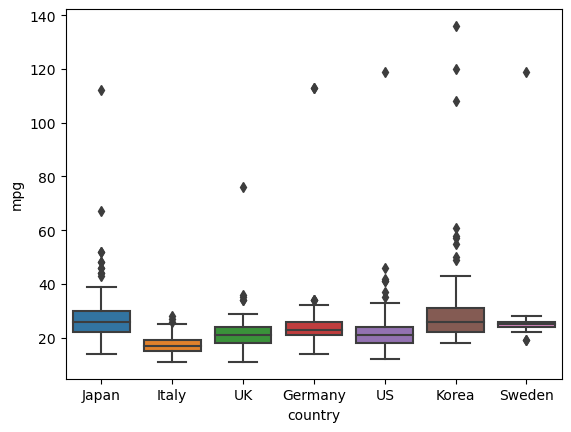

In [27]:
# Create a boxplot for MPG per country
sns.boxplot(x='country', y='mpg', data=carsDF)
plt.show()

In [28]:
countryDF = carsDF.groupby('country')['mpg'].mean().reset_index(name='AverageMPG')

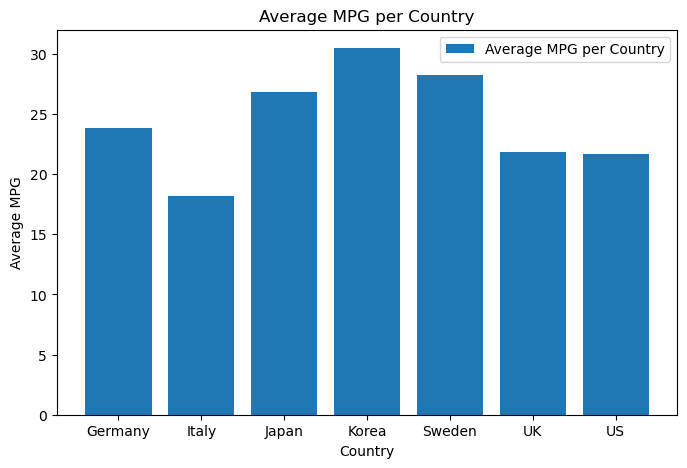

In [29]:
# Create bar chart to compare the mean MPG per country
countryDF.head(10)
fig = plt.figure(figsize = (8,5))  # set the size of the plot area 
plt.bar(countryDF['country'],countryDF[ 'AverageMPG'], label= "Average MPG per Country")
plt.xlabel('Country')
plt.ylabel('Average MPG')
plt.title('Average MPG per Country')
plt.legend()
plt.show()


In [32]:
# Calculate the mean, median, and standard deviation of MPG by country
mpgCalc = carsDF.groupby('country')['mpg'].agg(['mean', 'median', 'std'])
mpgCalc 

,mean,median,std
country,,,
Germany,23.821012,23.0,8.780253
Italy,18.200000,17.0,4.618802
Japan,26.817518,26.0,8.598253
Korea,30.471698,26.0,17.862015
Sweden,28.240000,25.0,19.048797
UK,21.866667,21.0,8.164414
US,21.694286,21.0,7.222674


In [34]:
mpgCalc = mpgCalc.rename(columns={'mean': 'MeanMPG', 'median': 'MedianMPG', 'std': 'SdMPG'})
mpgCalc

,MeanMPG,MedianMPG,SdMPG
country,,,
Germany,23.821012,23.0,8.780253
Italy,18.200000,17.0,4.618802
Japan,26.817518,26.0,8.598253
Korea,30.471698,26.0,17.862015
Sweden,28.240000,25.0,19.048797
UK,21.866667,21.0,8.164414
US,21.694286,21.0,7.222674


In [35]:
# Print the mean MPG per country 
print(mpgCalc['MeanMPG'])

country
Germany    23.821012
Italy      18.200000
Japan      26.817518
Korea      30.471698
Sweden     28.240000
UK         21.866667
US         21.694286
Name: MeanMPG, dtype: float64


In [37]:
# Filter the dataset to include only small SUVs and standard SUVs
vehclassDF = carsDF[carsDF['vehClass'].isin(['small SUV', 'standard SUV'])]
vehclassDF

,country,model,cyl,drive,fuel,vehClass,mpg
1,Japan,ACURA MDX,6.0,4WD,Gasoline,small SUV,27
2,Japan,ACURA MDX,6.0,2WD,Gasoline,small SUV,23
3,Japan,ACURA MDX,6.0,4WD,Gasoline,small SUV,22
4,Japan,ACURA MDX A-spec,6.0,4WD,Gasoline,small SUV,21
6,Japan,ACURA RDX,4.0,2WD,Gasoline,small SUV,24
...,...,...,...,...,...,...,...
1107,Sweden,VOLVO XC60,4.0,4WD,Gasoline,small SUV,22
1108,Sweden,VOLVO XC60,4.0,4WD,Gasoline,small SUV,23
1109,Sweden,VOLVO XC90,4.0,2WD,Gasoline,standard SUV,24
1110,Sweden,VOLVO XC90,4.0,4WD,Gasoline,standard SUV,22


In [39]:
# Calculate the mean and standard deviation of MPG for small SUVs and standard SUVs
smallsuvMEAN = vehclassDF[vehclassDF['vehClass'] == 'small SUV']['mpg'].mean()
smallsuvMEAN

25.317535545023695

In [41]:
smallsuvSTD = vehclassDF[vehclassDF['vehClass'] == 'small SUV']['mpg'].std()
smallsuvSTD

8.676658649855458

In [45]:
standardsuvMEAN = vehclassDF[vehclassDF['vehClass'] == 'standard SUV']['mpg'].mean()
standardsuvMEAN

18.70175438596491

In [47]:
standardsuvSTD = vehclassDF[vehclassDF['vehClass'] == 'standard SUV']['mpg'].std()
standardsuvSTD

3.2531259971447737

In [48]:
# Import the ttest_ind function
from scipy.stats import ttest_ind

In [50]:
t_statistic, p_value = ttest_ind(vehclassDF[vehclassDF['vehClass'] == 'small SUV']['mpg'], 

                                 vehclassDF[vehclassDF['vehClass'] == 'standard SUV']['mpg'], 

                                 equal_var=False)
t_statistic, p_value


(9.866281667326529, 4.874274636215322e-20)

In [51]:
# Print the results
print("Descriptive statistics for small SUVs:\n mean={:.2f}, std={:.2f}".format(smallsuvMEAN, smallsuvSTD))

Descriptive statistics for small SUVs:
 mean=25.32, std=8.68


In [52]:
print("Descriptive statistics for standard SUVs:\n mean={:.2f}, std={:.2f}".format(standardsuvMEAN, standardsuvSTD))

Descriptive statistics for standard SUVs:
 mean=18.70, std=3.25


In [53]:
print("T-Test results:\n t-statistic={:.2f}, p-value={:.2e}".format(t_statistic, p_value))

T-Test results:
 t-statistic=9.87, p-value=4.87e-20
